In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Quikr_car.csv")

In [3]:
df.head()

,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
0,Ford Figo Duratec Petrol EXI 1.2 - 2015,PLATINUM,Bangalore,"3,80,000","35,056 kms",Petrol,NaN,2015,Ford
1,Maruti Suzuki Wagon R VXI BS IV - 2016,PLATINUM,Bangalore,"4,65,000","44,000 kms",Petrol,NaN,2016,Maruti
2,Hyundai Creta 1.6 SX PLUS AUTO PETROL - 2018,PLATINUM,Bangalore,"13,50,000","42,917 kms",Petrol,NaN,2018,Hyundai
3,Hyundai Venue - 2019,PLATINUM,Chennai,"10,19,699","16,112 kms",Petrol,2nd Owner,2019,Hyundai
4,Honda Jazz - 2017,PLATINUM,Pune,"7,13,499","30,988 kms",Petrol,2nd Owner,2017,Honda


In [4]:
df.isnull().sum()

Name            0
Label           0
Location        2
Price           6
Kms_driven      0
Fuel_type       0
Owner         292
Year            0
Company         0
dtype: int64

In [5]:
df = df.dropna()


In [6]:
df.isnull().sum()

Name          0
Label         0
Location      0
Price         0
Kms_driven    0
Fuel_type     0
Owner         0
Year          0
Company       0
dtype: int64

In [7]:
df["Owner"] = df["Owner"].str.replace("1st Owner", "1")
df["Owner"] = df["Owner"].str.replace("2nd Owner", "2")
df["Owner"] = df["Owner"].str.replace("3rd Owner", "3")

In [8]:
df["Price"] = df["Price"].str.replace(",", "")
df["Kms_driven"] = df["Kms_driven"].str.replace(",", "")

In [9]:
df["Kms_driven"] = df["Kms_driven"].str.replace("kms", "")

In [10]:
df["Owner"] = df["Owner"].astype("int")
df["Price"] = df["Price"].astype("int")
df["Kms_driven"] = df["Kms_driven"].astype("int")

In [11]:
df.dtypes

Name          object
Label         object
Location      object
Price          int32
Kms_driven     int32
Fuel_type     object
Owner          int32
Year           int64
Company       object
dtype: object

In [12]:
df.head()


,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
3,Hyundai Venue - 2019,PLATINUM,Chennai,1019699,16112,Petrol,2,2019,Hyundai
4,Honda Jazz - 2017,PLATINUM,Pune,713499,30988,Petrol,2,2017,Honda
5,Hyundai i20 - 2013,PLATINUM,Pune,391099,69163,Diesel,2,2013,Hyundai
6,Maruti Suzuki Swift Dzire VXi 1.2 BS IV - 2015,PLATINUM,Pune,474299,42859,Petrol,2,2015,Maruti
7,Toyota Corolla Altis VL AT - 2017,PLATINUM,Pune,1252999,34919,Petrol,1,2017,Toyota


In [13]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 

In [14]:
df.dtypes

Name          object
Label         object
Location      object
Price          int32
Kms_driven     int32
Fuel_type     object
Owner          int32
Year           int64
Company       object
dtype: object

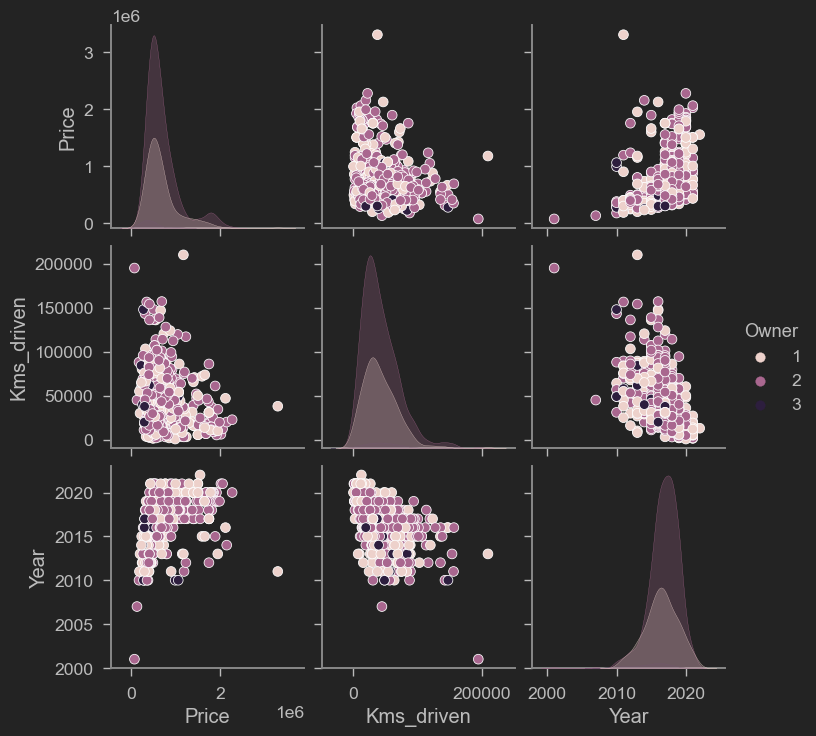

In [15]:
sns.pairplot(df[["Price","Kms_driven","Year","Owner"]],hue="Owner")

In [16]:
df.corr()

C:\Users\Dell\AppData\Local\Temp\ipykernel_18132\1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Price,Kms_driven,Owner,Year
Price,1.000000,-0.160056,-0.027680,0.372076
Kms_driven,-0.160056,1.000000,0.019785,-0.525997
Owner,-0.027680,0.019785,1.000000,0.013313
Year,0.372076,-0.525997,0.013313,1.000000


C:\Users\Dell\AppData\Local\Temp\ipykernel_18132\873084995.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

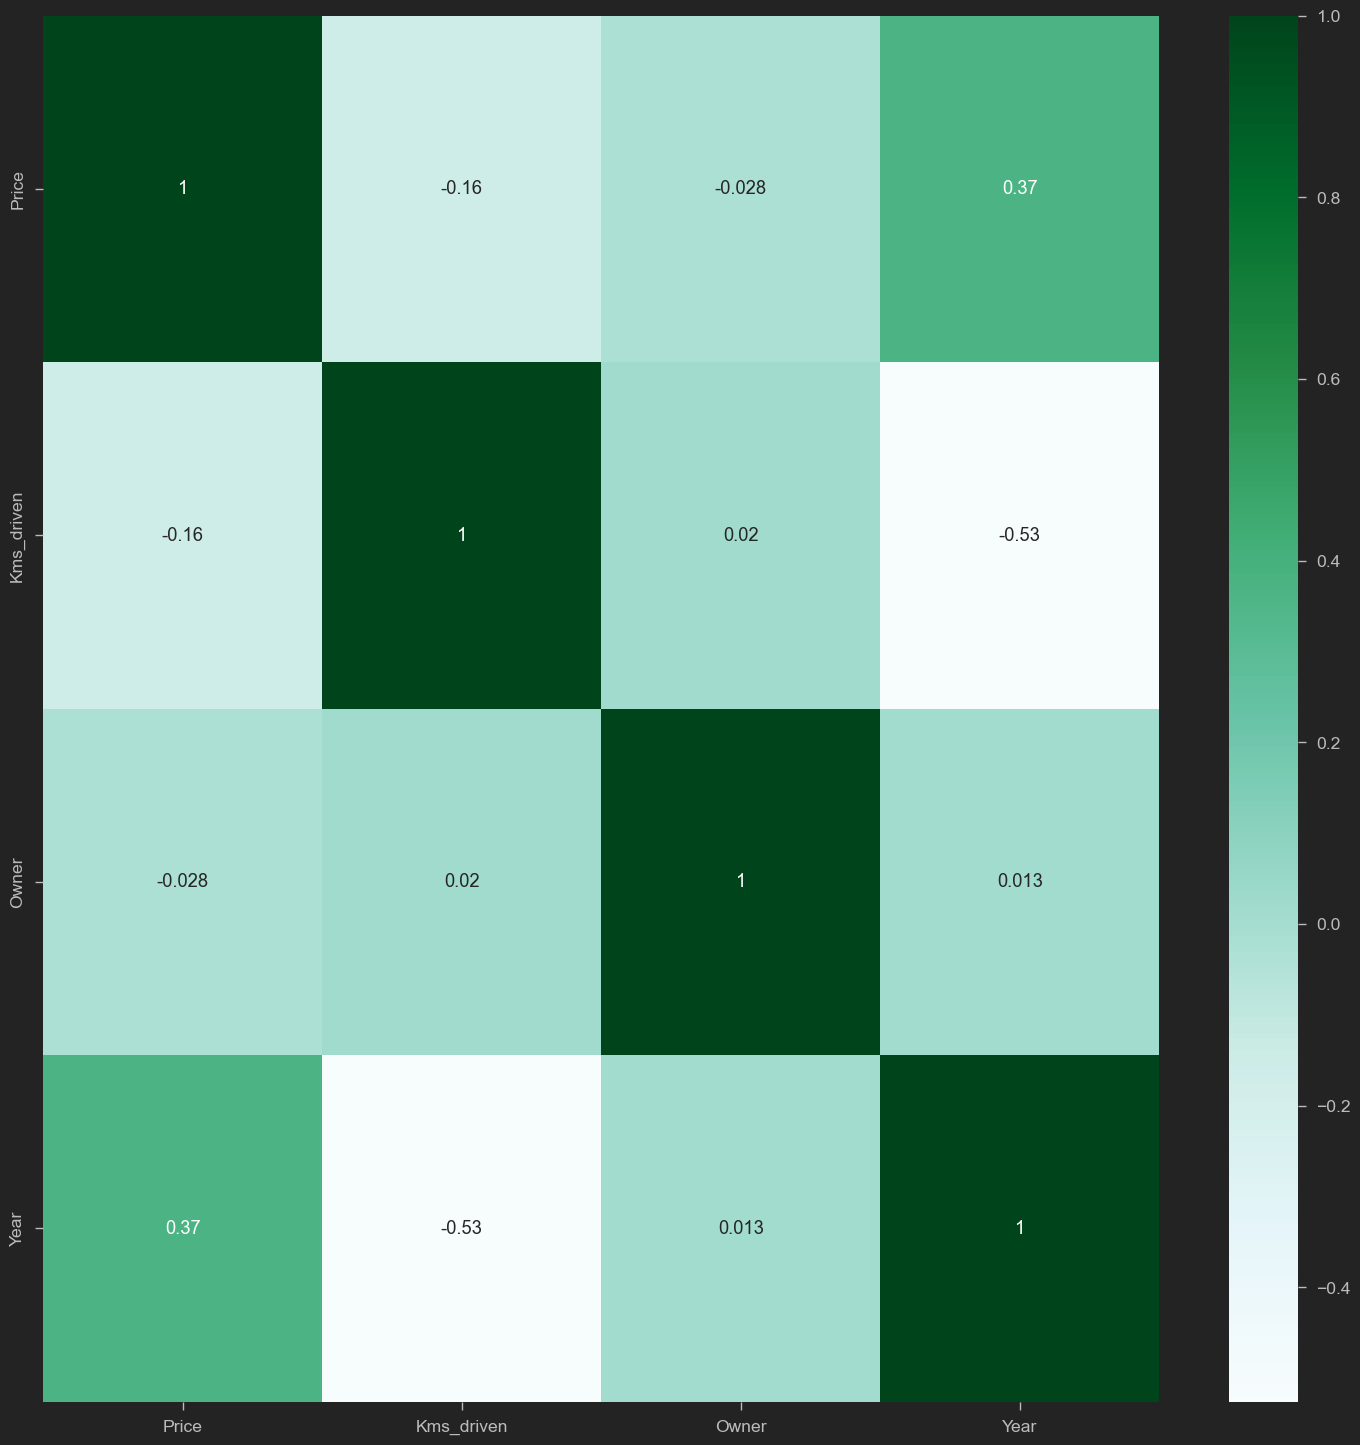

In [17]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), cmap= "BuGn", annot=True)

In [18]:
df.head()


,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
3,Hyundai Venue - 2019,PLATINUM,Chennai,1019699,16112,Petrol,2,2019,Hyundai
4,Honda Jazz - 2017,PLATINUM,Pune,713499,30988,Petrol,2,2017,Honda
5,Hyundai i20 - 2013,PLATINUM,Pune,391099,69163,Diesel,2,2013,Hyundai
6,Maruti Suzuki Swift Dzire VXi 1.2 BS IV - 2015,PLATINUM,Pune,474299,42859,Petrol,2,2015,Maruti
7,Toyota Corolla Altis VL AT - 2017,PLATINUM,Pune,1252999,34919,Petrol,1,2017,Toyota


In [19]:
df.dtypes


Name          object
Label         object
Location      object
Price          int32
Kms_driven     int32
Fuel_type     object
Owner          int32
Year           int64
Company       object
dtype: object

In [20]:
df.columns


Index(['Name', 'Label', 'Location', 'Price', 'Kms_driven', 'Fuel_type',
       'Owner', 'Year', 'Company'],
      dtype='object')

In [15]:
df_new = pd.get_dummies(df, columns= ['Name', 'Label', 'Location', 'Fuel_type', 'Company'])

In [16]:
df_new.head()

,Price,Kms_driven,Owner,Year,Name_Audi Q3 - 2015,Name_BMW 3 Series 320d - 2013,Name_BMW 3 Series 320d Luxury Line - 2015,Name_BMW 5 Series 523i Sedan - 2010,Name_Chevrolet Sail 1.2 LS - 2013,Name_Datsun Redi GO - 2017,...,Company_Maruti,Company_Mercedes,Company_Nissan,Company_Porsche,Company_Renault,Company_Skoda,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo
3,1019699,16112,2,2019,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,713499,30988,2,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,391099,69163,2,2013,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,474299,42859,2,2015,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1252999,34919,1,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
X = df_new.drop("Price", axis=1)
y = df_new["Price"]

In [18]:
X

,Kms_driven,Owner,Year,Name_Audi Q3 - 2015,Name_BMW 3 Series 320d - 2013,Name_BMW 3 Series 320d Luxury Line - 2015,Name_BMW 5 Series 523i Sedan - 2010,Name_Chevrolet Sail 1.2 LS - 2013,Name_Datsun Redi GO - 2017,Name_Datsun Redi GO - 2018,...,Company_Maruti,Company_Mercedes,Company_Nissan,Company_Porsche,Company_Renault,Company_Skoda,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo
3,16112,2,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30988,2,2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,69163,2,2013,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,42859,2,2015,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,34919,1,2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,29632,2,2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1027,65000,1,2014,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1029,31000,1,2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1030,31000,1,2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
y

3       1019699
4        713499
5        391099
6        474299
7       1252999
         ...   
1023     481399
1027     229000
1029    1750000
1030    1750000
1031    1750000
Name: Price, Length: 737, dtype: int32

In [20]:
X = np.array(X)
y= np.array(y)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=2)

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
random_model = RandomForestRegressor()
random_model.fit(X_train, y_train)
random_model.score(X_test, y_test)

0.809982734773551

In [31]:
from xgboost import XGBRegressor

In [32]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_model.score(X_test, y_test)

0.8203022394714998

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)

0.8056085663543814

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
dec_model = DecisionTreeRegressor()
dec_model.fit(X_train, y_train)
dec_model.score(X_test, y_test)

0.7727066236818463

In [37]:
import matplotlib.pyplot as plt
from sklearn import metrics

In [38]:
from sklearn.metrics import mean_squared_error

In [25]:
y_predR = random_model.predict(X_test)
print(y_predR)

[ 673674.         1160809.18        687912.14        469974.
 1394523.9         471784.          485131.04        613383.
  364798.13        488694.          374543.28        572150.
  472889.          744178.          462457.          320399.99
  546804.          540418.01        451415.          501194.
  415379.9         531815.01        612029.          585934.05
 1380283.          434165.14        477920.          897522.14
  503279.         1276241.39333333  447625.         1044256.
  488101.          579171.          454693.          599149.14
 1227793.19        794911.11        682016.          420996.03
  708423.01        387404.78        468788.          863847.52
 1880594.9         471585.          399188.11       1002174.02
  485979.          503499.          388721.          430687.01
  491667.01        702408.          473499.          494234.2
  876962.34        458271.          450667.          411967.01
  539573.          969767.04        435488.          613071.01
  3

In [41]:
from yellowbrick.regressor import ResidualsPlot

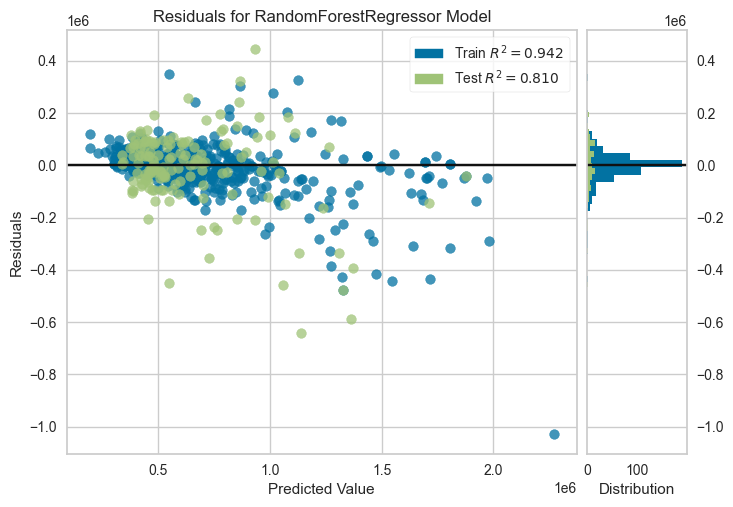

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [42]:
visualizer = ResidualsPlot(random_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

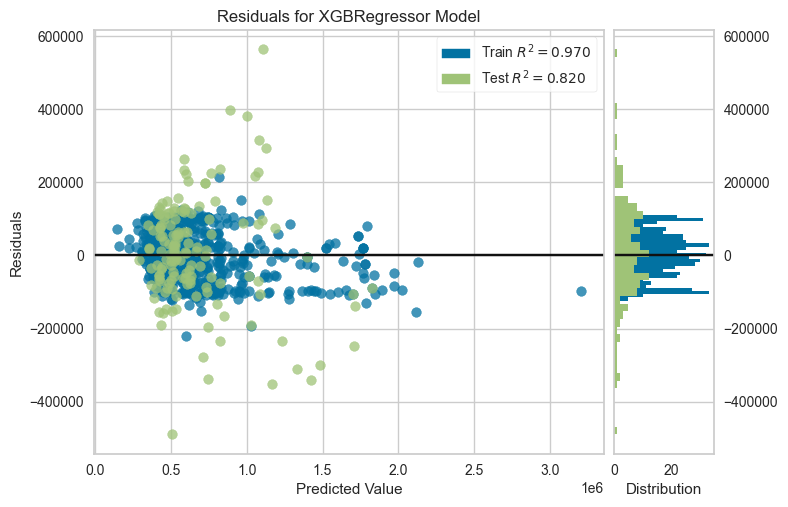

<Axes: title={'center': 'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [43]:
visualizer = ResidualsPlot(xgb_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

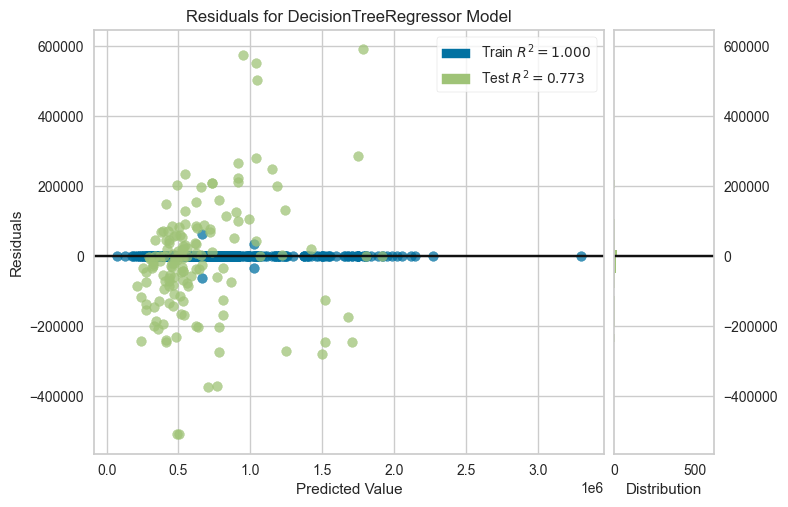

<Axes: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [44]:
visualizer = ResidualsPlot(dec_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [64]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.0,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.9,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.0,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.0,140Nm@ 1800-3000rpm,5.0


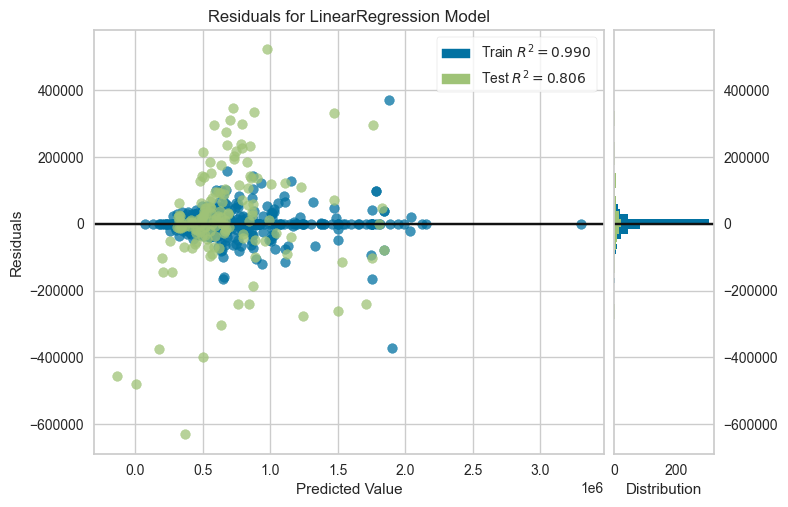

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [45]:
visualizer = ResidualsPlot(linear_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()